In [14]:
%matplotlib inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
matplotlib.rcParams.update({'font.size': 16})

## Значения функции на 2-мерной сетке

Text(0.5,0,'y')

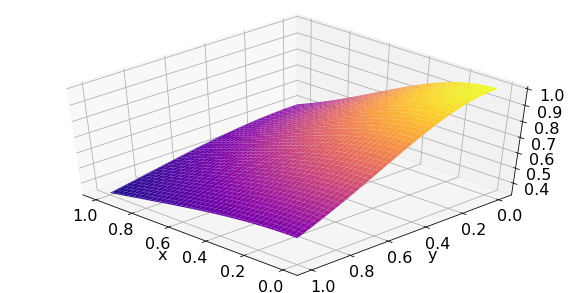

In [15]:
import numpy as np
n = 128
t = np.linspace(0, 1, n)
x, y = np.meshgrid(t, t)
f = 1/(x**2 + y**2 + 1) 
# f = np.sin(10*x/(y+1)**2)**2 * np.cos(1*(x-0.5)+ 8*y)**3
fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.view_init(45, 135)
ax.plot_surface(x, y, f, cmap = 'plasma')
ax.set_xlabel('x')
ax.set_ylabel('y')

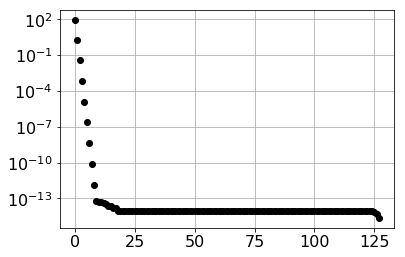

In [16]:
u, s, v = np.linalg.svd(f)
plt.semilogy(s,'ko')
plt.grid(True)

error = 9.64e-14


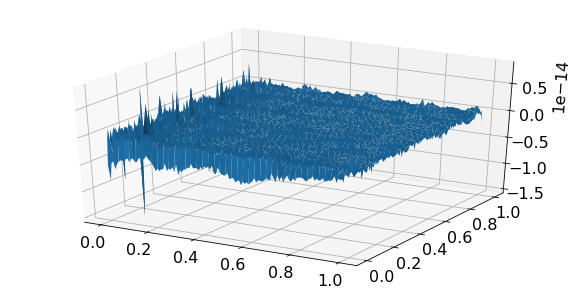

In [17]:
r = 10
ur = u[:, :r]
sr = s[:r]
vr = v[:r, :] # Транспонированная матрица
fappr = ur @ np.diag(sr) @ vr
er = np.linalg.norm(fappr - f, 'fro')
print('error = {0:5.2e}'.format(er))
fig = plt.figure(figsize = (10,5))
ax2 = fig.add_subplot(1, 1, 1, projection='3d')
ax2.plot_surface(x, y, fappr - f)

## Сжатие изображений

(333, 500, 3) uint8


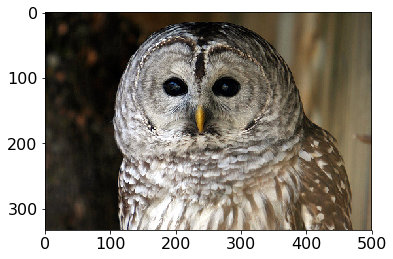

In [18]:
from scipy import ndimage
import imageio
# Читаем файл в многомерный массив 
face = imageio.imread('figures/fig2.jpg') 
print(face.shape, face.dtype) # размеры и тип
plt.imshow(face)

average error =  0.02928759989231089 
 max error =  255


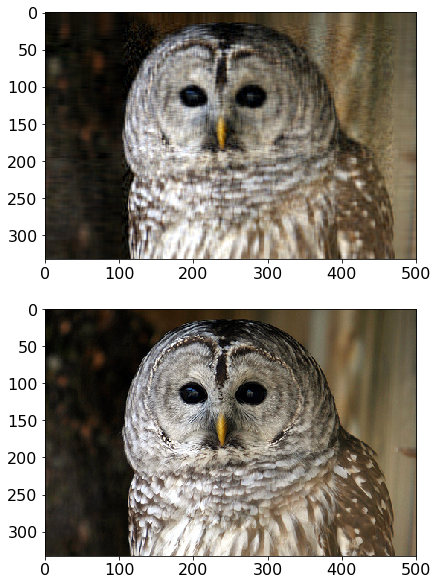

In [19]:
face_appr = np.zeros(shape = face.shape, dtype = float) 
r = 30# max(face.shape[0:1]) 
for i in range(0,3):
    u, s, v = np.linalg.svd(face[:,:,i])
    u_r = u[:, :r]
    s_r = s[:r]
    v_r = v[:r, :] 
    face_appr[:,:,i] = u_r.dot(np.diag(s_r).dot(v_r))
face_appr = np.clip(np.rint(face_appr), 0, 255)
face_appr = face_appr.astype('uint8')
error = face - face_appr

fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (20,10))
ax2.imshow(face)
ax1.imshow(face_appr) 
print('average error = ', 
      (np.sum(error**2)/(face.shape[0] * face.shape[1] * 3))**(0.5)/255,
      '\n max error = ', np.max(error))